# 小麦とチェス盤問題
曽呂利新左衛門の米の逸話に似たものとして、小麦とチェス盤の話があります。これを題材に多次元配列を扱うための数値計算ライブラリ**NumPy**の使い方に慣れていきます。
>If a chessboard were to have wheat placed upon each square such that one grain were placed on the first square, two on the second, four on the third, and so on (doubling the number of grains on each subsequent square), how many grains of wheat would be on the chessboard at the finish?

[Wheat and chessboard problem - Wikipedia
](https://en.wikipedia.org/wiki/Wheat_and_chessboard_problem)

（最終閲覧日：2019年5月31日）

8×8マスのチェス盤の上に、小麦の粒を1, 2, 4と順番に置いていくと最終的な小麦の数はどのようになるかという問題です。

# 少ないマスで考える
まずは4マスの板に小麦の粒を並べていくことを考えます。配列（リスト）の1つの要素を1つのマスに見立てています。

Pythonのリストとfor文を使い次のように作ることができます。



###《サンプルコード》

In [1]:
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]


このリストにnp.array()を使うことで、ndarrayを作成することができます。

In [3]:
import numpy as np

small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


## 【問題1】2×2マスのチェス盤の小麦の数
2×2マスのチェス盤をndarrayによって表現し、各マスの小麦の数を計算してください。左上のマスに小麦を1つ置いた後、その右が2つ、左下が4つ、右下が8つという風に進みます。

サンプルコードで作成したndarrayのshapeの変形を行ってください。

### 【問題1】解答

In [2]:
import numpy as np

n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])

small_board_ndarray = np.array(small_board_list)

reshape_small_board_ndarray = small_board_ndarray.reshape([2, 2])
print(reshape_small_board_ndarray)

[[1 2]
 [4 8]]


# 4.8×8マスのチェス盤


## 【問題2】n×mマスへの拡張
n×mマスのチェス盤の小麦の数を記したndarrayを返す関数を作成してください。そして、この関数を使い8×8マスのチェス盤の小麦の数を求めてください。

### 【問題2】解答

In [22]:
import numpy as np

def distribute_grain(n, m): # 小麦を各マスに倍々で分配する関数
  n_squares = n*m
  board_list = [1]
  for _ in range(n_squares - 1):
    board_list.append(2*board_list[-1])
  board_ndarray = np.array(board_list).reshape(n, m)
  return board_ndarray.astype(np.uint64)

print(distribute_grain(8, 8))

[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       70368744177664     140737488355328

## 【問題3】小麦の数の合計
8×8マスのチェス盤の小麦の数の合計を求めてください。また、各列の平均を求め、それを棒グラフで可視化してください。

棒グラフはサンプルコードを用意しています。

### 《棒グラフのサンプルコード》

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1,4), np.array([1, 2, 3]))
plt.show()

matplotlib.pyplot.bar — Matplotlib 3.1.0 documentation

https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.bar.html

### 【問題3】解答

8×8マスのチェス盤の小麦の数の合計：18446744073709551615
各列の小麦の数の平均：[   9042521604759584   18085043209519168   36170086419038336
   72340172838076672  144680345676153344  289360691352306688
  578721382704613376 1157442765409226752]


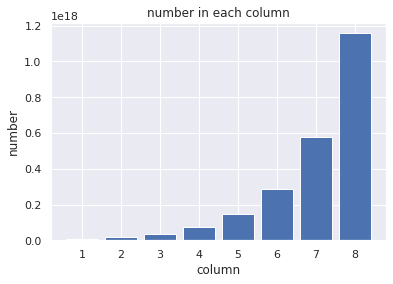

In [52]:
import numpy as np

def distribute_grain(n, m): # 小麦を各マスに倍々で分配する関数
  n_squares = n*m
  board_list = [1]
  for _ in range(n_squares - 1):
    board_list.append(2*board_list[-1])
  board_ndarray = np.array(board_list).reshape(n, m).astype(np.uint64)
  return board_ndarray

total_grains = distribute_grain(8, 8).sum() # 8×8マスのチェス盤の小麦の数の合計
mean_columns = distribute_grain(8, 8).mean(axis=0).astype(np.uint64) # 各列の小麦の数の平均

print('8×8マスのチェス盤の小麦の数の合計：{}'.format(total_grains))
print('各列の小麦の数の平均：{}'.format(mean_columns))

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()
plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.bar(np.arange(1,9), mean_board_columns)
plt.show()

## 【問題4】小麦の数のヒートマップ
8×8マスのチェス盤の小麦の数をヒートマップとして可視化してください。

ヒートマップはサンプルコードを用意しています。

### 《ヒートマップのサンプルコード》

4行2列の配列のヒートマップです。値が小さいところが紫、大きいところが黄色になっています。

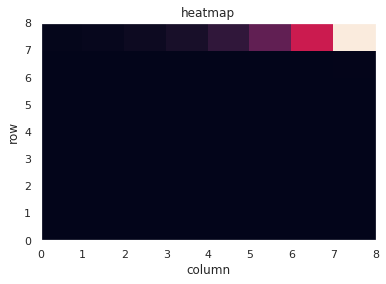

In [0]:
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(np.array([0, 1, 3, 5, 7, 9, 11, 13]).reshape(4, 2))
plt.show()

[matplotlib.pyplot.bar — Matplotlib 3.1.0 documentation
](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.bar.html)

### 【問題4】解答

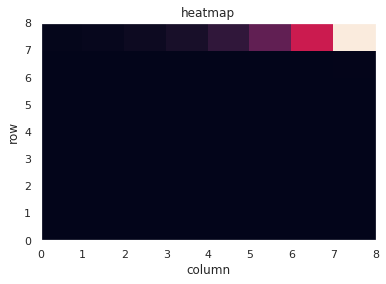

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def distribute_grain(n, m): # 小麦を各マスに倍々で分配する関数
  n_squares = n*m
  board_list = [1]
  for _ in range(n_squares - 1):
    board_list.append(2*board_list[-1])
  board_ndarray = np.array(board_list).reshape(n, m).astype(np.uint64)
  return board_ndarray

sns.set()
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(distribute_grain(8, 8))
plt.show()

# チェス盤の後半
アメリカの発明家レイ・カーツワイルはこの逸話を引用し、「チェス盤の後半」というフレーズを作りました。技術の進歩ははじめの内は社会に対して目立った影響が感じられなくとも、倍に倍にと進んでいくと、チェス盤の後半にさしかかったころから、急激な変化を起こすということを伝えています。



## 【問題5】後半は前半の何倍か
チェス盤の後半にある小麦の数は前半にある小麦の数の何倍かを求めてください。前半とは配列の0から3行目、後半は4から7行目です。

### 【問題5】解答

In [15]:
import numpy as np

def distribute_grain(n, m): # 小麦を各マスに倍々で分配する関数
  n_squares = n*m
  board_list = [1]
  for _ in range(n_squares - 1):
    board_list.append(2*board_list[-1])
  board_ndarray = np.array(board_list).reshape(n, m)
  return board_ndarray.astype(np.uint64)

whole_board = distribute_grain(8, 8)
first_half = whole_board[:4, :]
second_half = whole_board[4:, :]

ratio = second_half.sum()/first_half.sum() 
print('後半にある小麦の数：前半にある小麦の{:.0f}倍'.format(ratio))

後半にある小麦の数：前半にある小麦の4294967296倍


## 他の計算方法
はじめのサンプルコードではPythonのリストとfor文を使っていましたが、他の方法も考えられます。

ndarrayのnp.append()とfor文を使うと次のように作ることができます。

### 《サンプルコード（np.append()）》







In [59]:
n_squares = 4
small_board_ndarray = np.array([1])
for _ in range(n_squares - 1):
    small_board_ndarray = np.append(small_board_ndarray, 2*small_board_ndarray[-1])
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[  1   2   4   8  16  32  64 128]


ブロードキャストを活用することで、次のようにも作ることができます。

### 《サンプルコード（ブロードキャスト）》

In [58]:
n_squares = 4
indices_of_squares = np.arange(n_squares)
small_board_ndarray = 2**indices_of_squares
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


### ndarrayの型
なお、これらの方法で64マスの小麦の数を調べたい場合、型の問題が出てきます。

In [7]:
n_squares = 64
board_ndarray = np.array([1])
for _ in range(n_squares - 1):
    board_ndarray = np.append(board_ndarray, 2*board_ndarray[-1])
print("最後のマスの小麦の数：{}".format(board_ndarray[-1])) # -9223372036854775808

最後のマスの小麦の数：-9223372036854775808


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in long_scalars
  after removing the cwd from sys.path.


In [9]:
n_squares = 64
indices_of_squares = np.arange(n_squares)
board_ndarray = 2**indices_of_squares
print("最後のマスの小麦の数：{}".format(board_ndarray[-1])) # -9223372036854775808

最後のマスの小麦の数：-9223372036854775808


最後の64マス目が<font color='red'>**-9223372036854775808**</font>と負の数になり明らかに間違っています。このndarrayの型を見ると、次のように**int64**です。

In [0]:
print(board_ndarray.dtype) # int64

int64は64ビットの整数型で、**-9,223,372,036,854,775,808 ~ 9,223,372,036,854,775,807**の範囲の整数値しか扱えないことを示しています。この値は**-2の64乗から2の64乗-1**です。そのため、2の64乗になる64マス目の値が範囲外となり、負の値として出てきてしまっているのです。

Pythonの整数型（int）にはこのような制限がありませんが、ndarrayは高速な計算が行える反面、こういった制約があり、型で扱える範囲を意識しておく必要があります。

今回は正の値しか利用しないため**uint64**を使用することで解決します。 **0 ~ 18,446,744,073,709,551,615**を扱うことができます。astypeメソッドを使うことで型を変換できるので、累乗の計算前にこれを使いndarrayをuint64型にしておきます。

In [0]:
n_squares = 64
indices_of_squares = np.arange(n_squares).astype(np.uint64)
board_ndarray = 2**indices_of_squares
print("最後のマスの小麦の数：{}".format(board_ndarray[-1])) # 9223372036854775808

これで正しく計算ができました。

## 【問題6】他の計算方法によるn×mマスへの拡張
問題2と同様の「n×mマスのチェス盤の小麦の数を記したndarrayを返す関数」を、np.append()を使ったものと、ブロードキャストを使ったもので新たに作成してください。

それらの関数を使い8×8マスのチェス盤の小麦の数を再び求めてください。


### 【問題6】解答

#### np.append()

In [0]:
import numpy as np

def distribute_grain(n, m): # 小麦を各マスに倍々で分配する関数
  n_squares = n*m
  board_ndarray = np.array([1])
  for _ in range(n_squares - 1):
    board_ndarray = np.append(board_ndarray, 2*board_ndarray[-1])
  return board_ndarray.astype(np.uint64).reshape(8, 8)

print(distribute_grain(8, 8))
total_grains = distribute_grain(8, 8).sum()
print('8×8マスのチェス盤の小麦の数の合計：{}'.format(total_grains))

ブロードキャスト

In [0]:
import numpy as np

def distribute_grain(n, m): # 小麦を各マスに倍々で分配する関数
  n_squares = n*m
  indices_of_squares = np.arange(n_squares)
  board_ndarray = 2**indices_of_squares.reshape(n, m).astype(np.uint64)
  return board_ndarray

print(distribute_grain(8, 8))
total_grains = distribute_grain(8, 8).sum()
print('8×8マスのチェス盤の小麦の数の合計：{}'.format(total_grains))

## 【問題7】計算時間の比較
3種類の方法を見てきました。それぞれの計算時間をJupyter Notebookの%%timeitを用いて計測し、比較と考察を行ってください。

%%timeitはセル内のコードを複数回実行し、その平均実行時間を出力する働きをします。

### 《%%timeitの例》


In [34]:
%%timeit
a = np.array([1, 2, 3])
b = np.array([1, 2, 3])
c = a + b

The slowest run took 30.77 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.47 µs per loop


### 【問題7】解答

#### リストとfor文

In [87]:
%%timeit
import numpy as np
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
small_board_ndarray = np.array(small_board_list)
# print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

The slowest run took 12.78 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 1.75 µs per loop


#### ブロードキャスト

In [86]:
%%timeit
import numpy as np
n_squares = 4
indices_of_squares = np.arange(n_squares)
small_board_ndarray = 2**indices_of_squares
# print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

The slowest run took 25.17 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 2.3 µs per loop


#### ndarrayの型

In [85]:
%%timeit
import numpy as np
n_squares = 4
small_board_ndarray = np.array([1])
for _ in range(n_squares - 1):
    small_board_ndarray = np.append(small_board_ndarray, 2*small_board_ndarray[-1])
# print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

The slowest run took 10.17 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 22.2 µs per loop
